<a href="https://colab.research.google.com/github/yaya1721/ML-spring22/blob/main/ML_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 2
Dania Herzalla dh2741 <br>
Long Phan lvp243 <br>
Sonya Hsieh yh3529 <br>

## Problem 1 & 2

finished

## Problem 3

Part A.   
i)

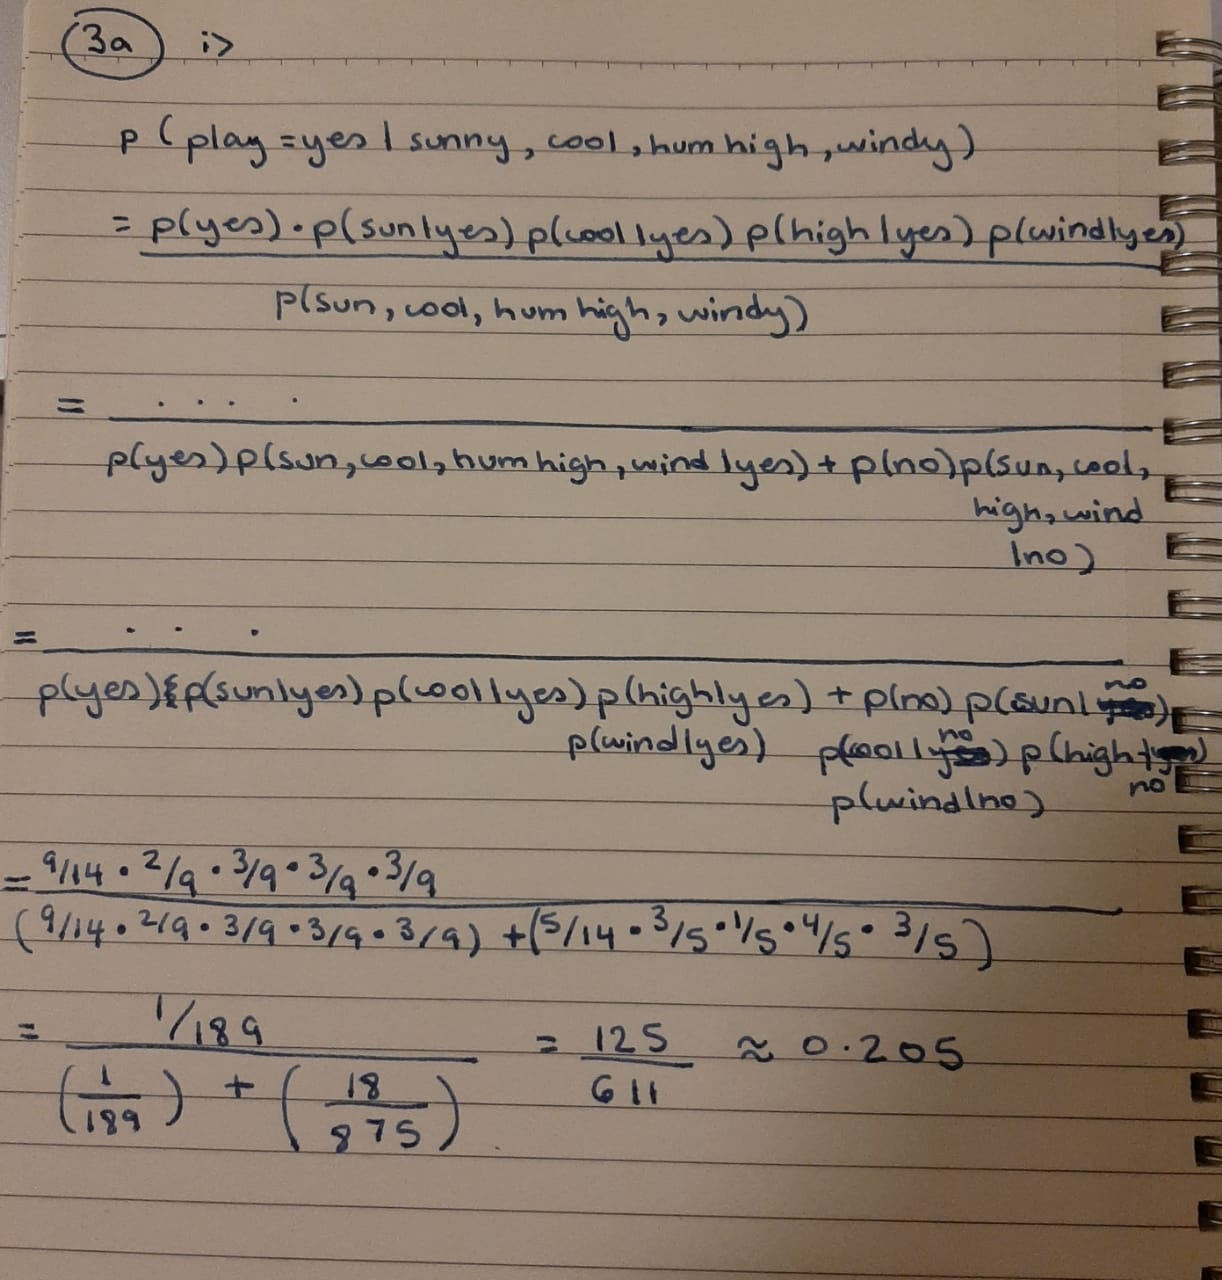

ii)

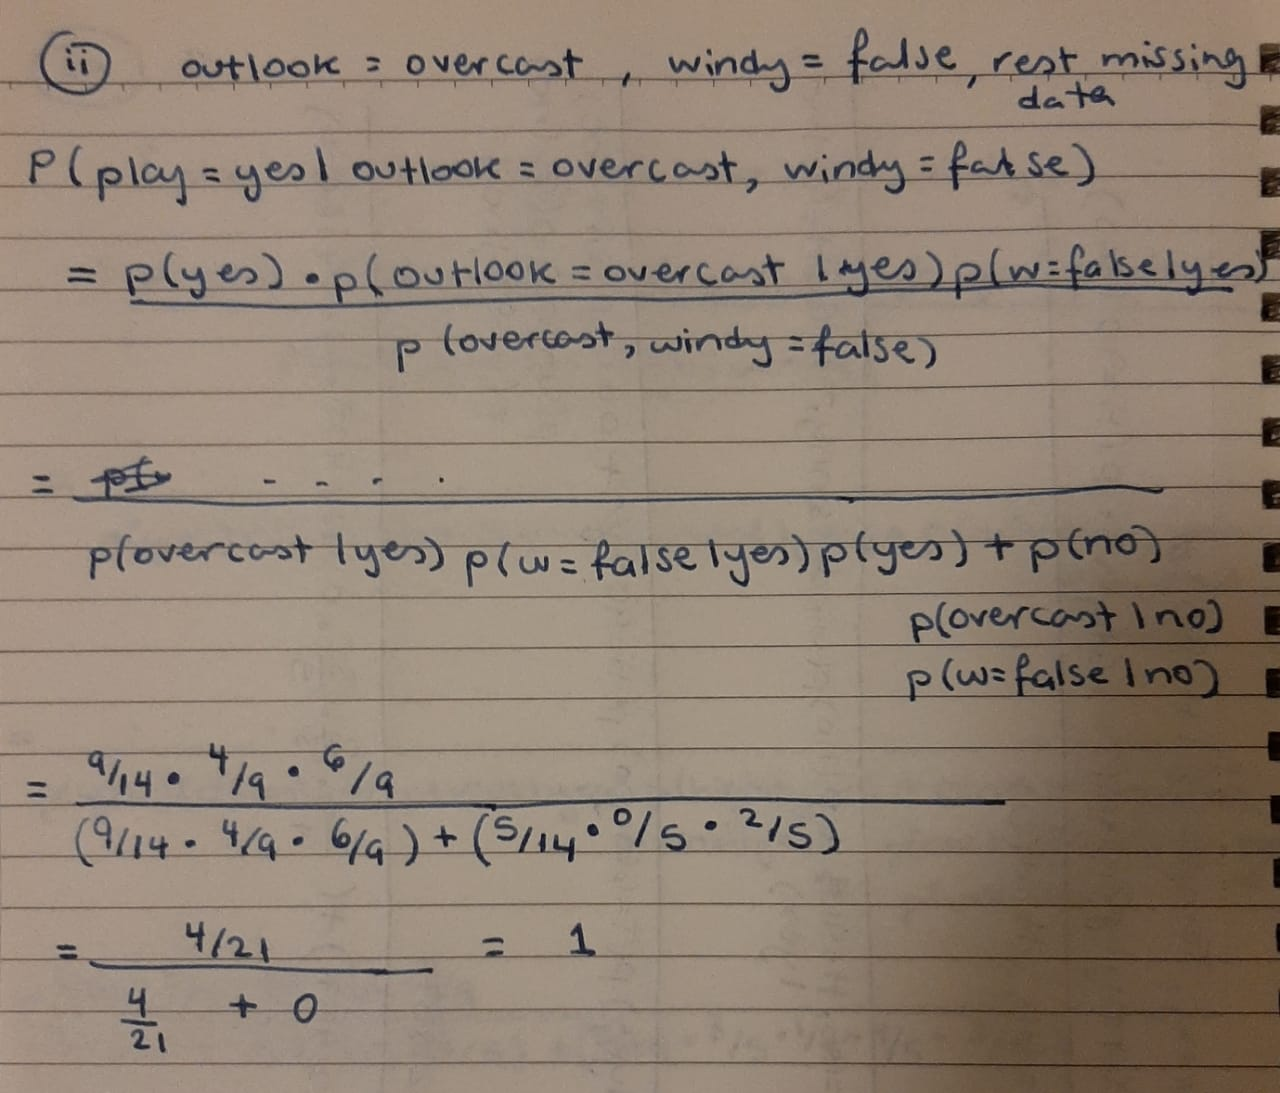

Applying Laplace Smoothing with alpha = 1 to i and ii:

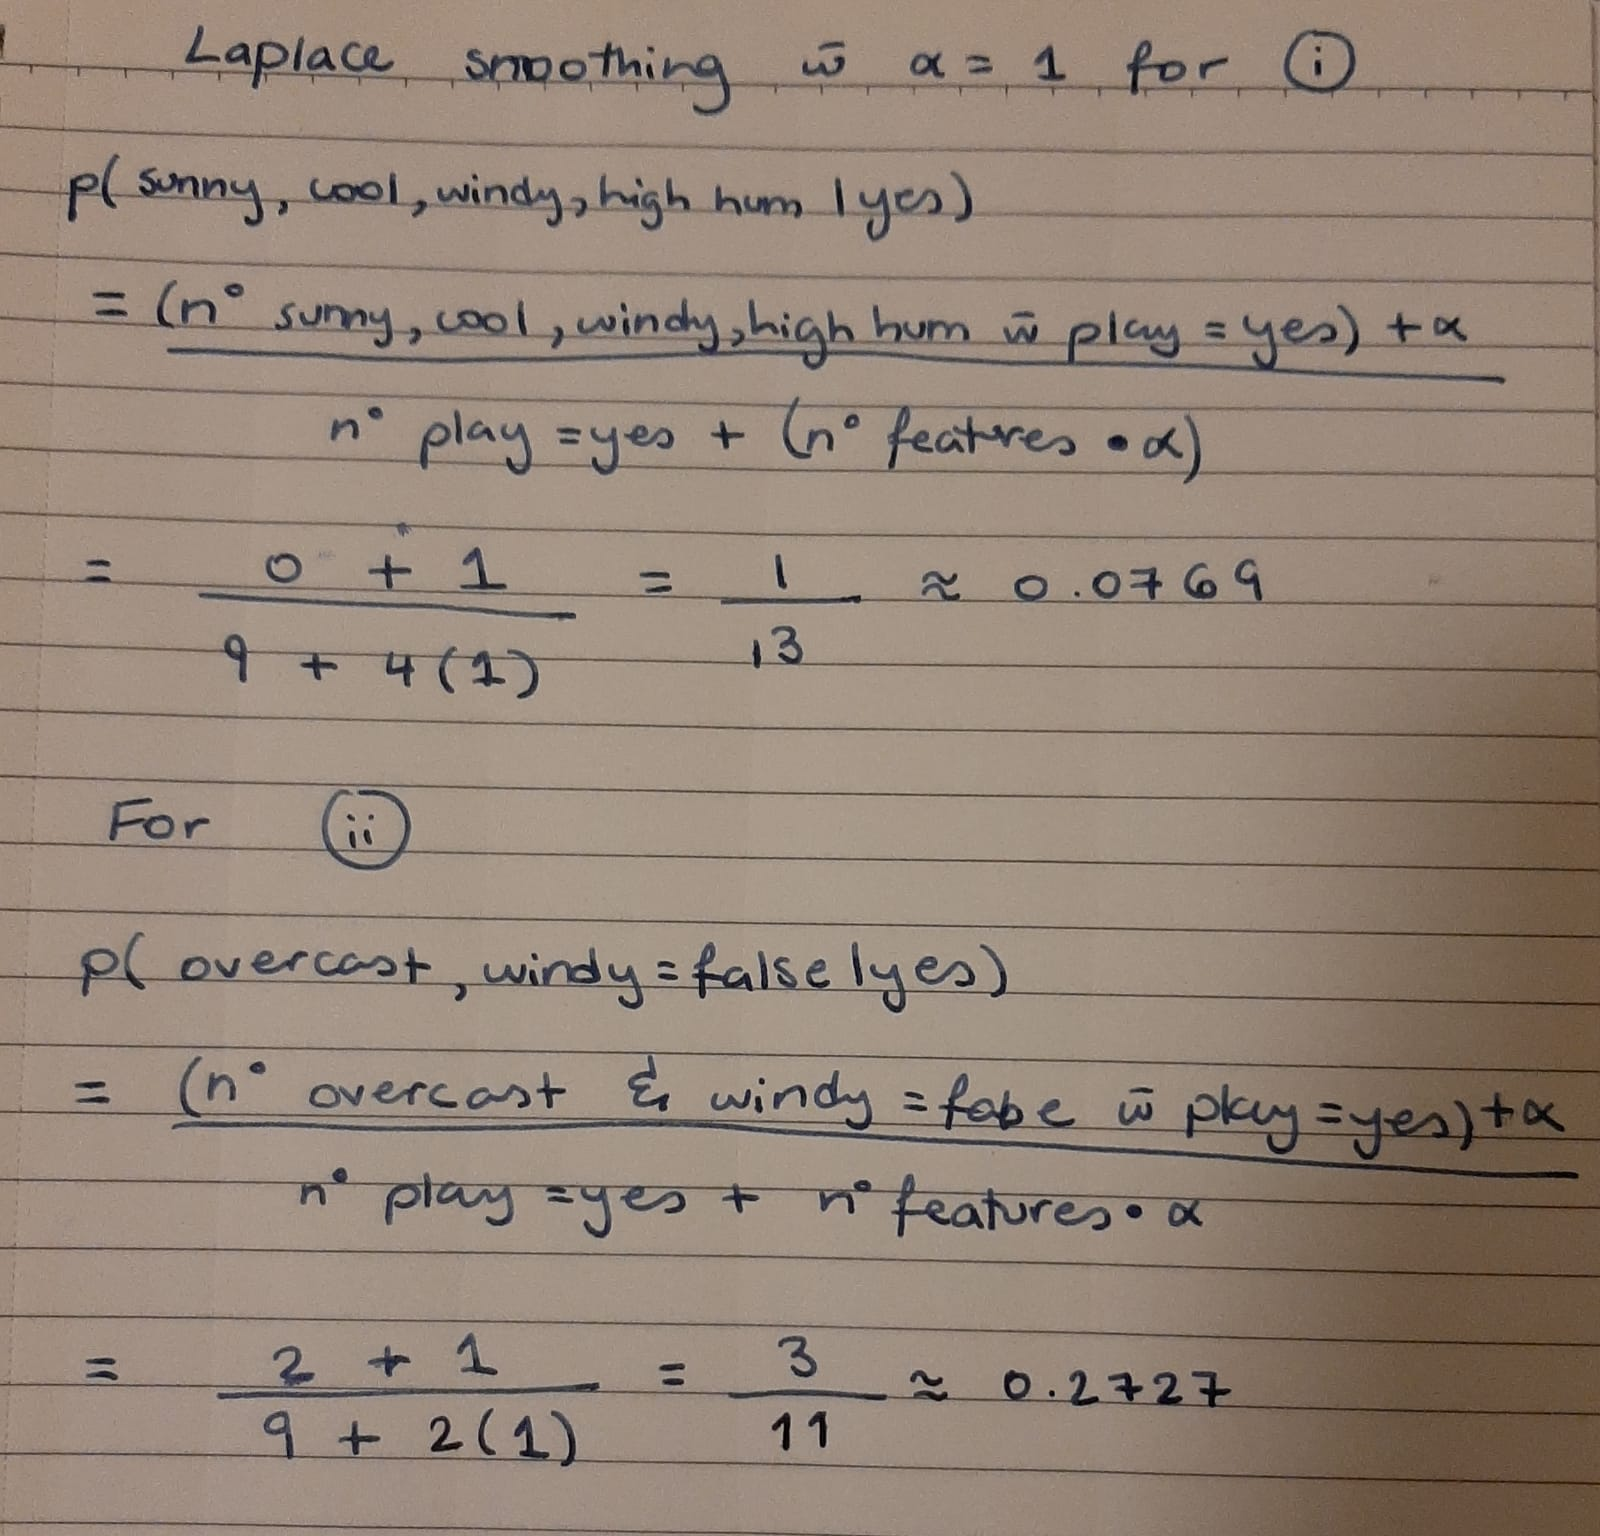

Part B.   
Calculating the mean and population variance for data points with play given yes and play given no in order to calculate the probabaility of temperature = 66 given yes or given no and humidity = 90 given yes or given no using Gaussian distribution pdf.

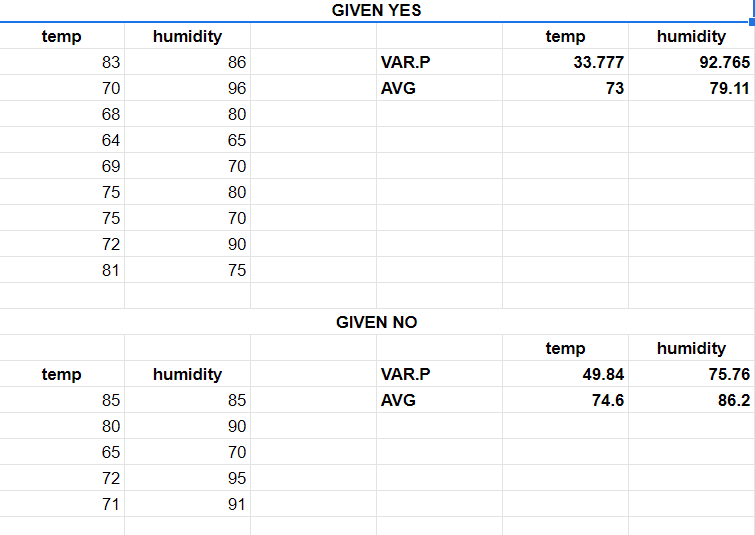

In Gaussian distrib pdf population variance VAR.P is used:

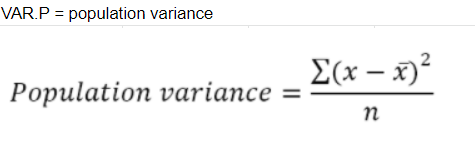

Finding probability of Temperature = 66 given yes (for data points with play == yes) and given no (for data points with play == no). The same is done for humidity = 90.   
   
The mean and variance in the Gaussian distribution pdf below are calculated using the data above with play given yes or given no.

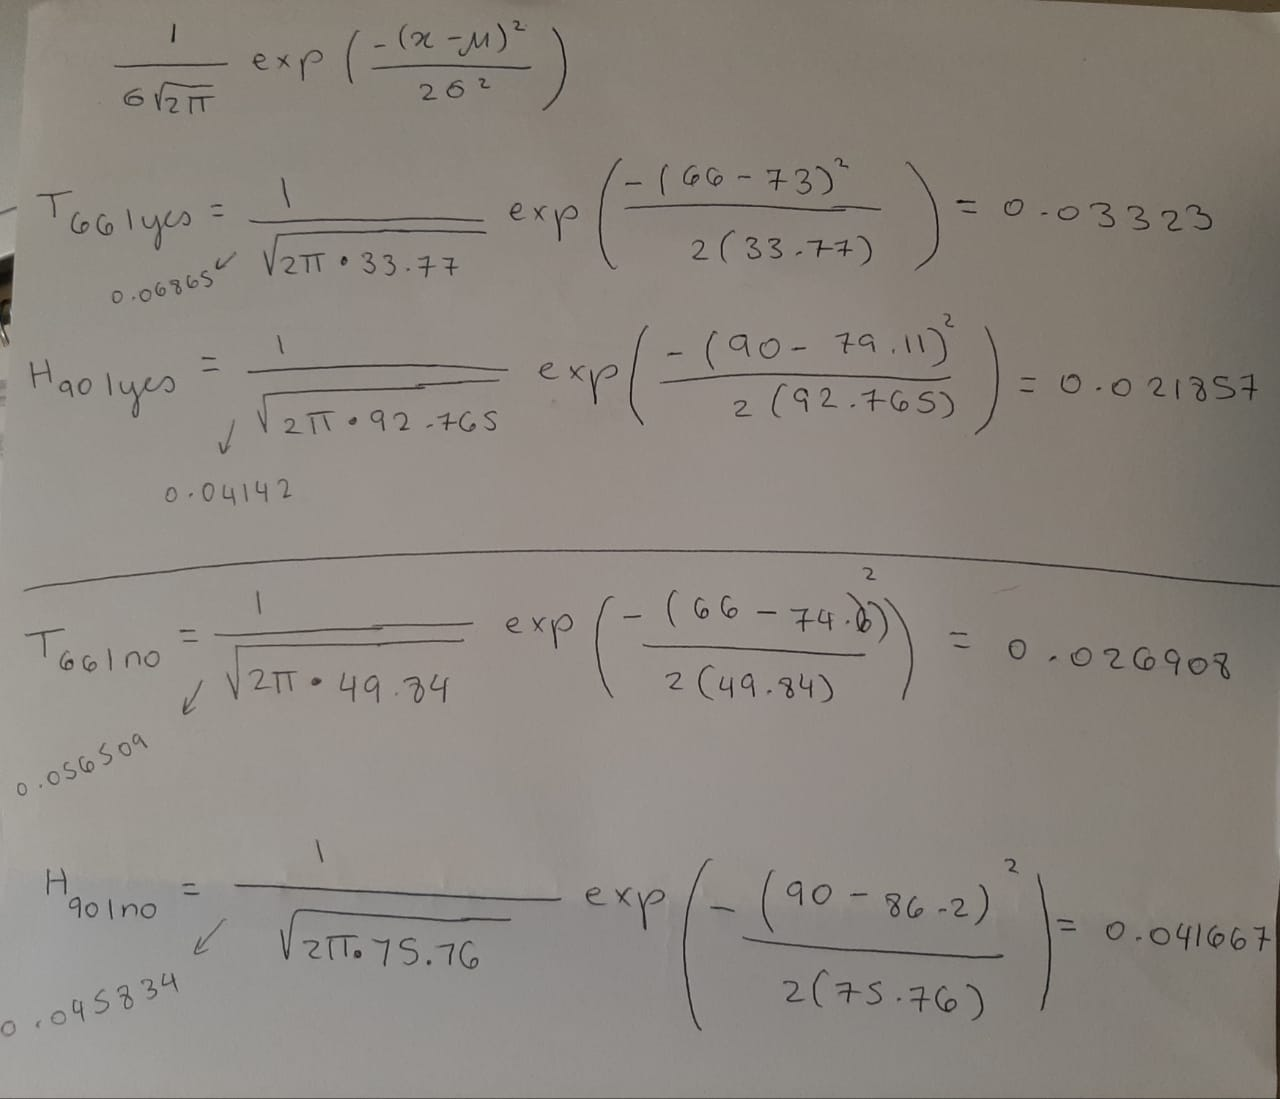

Calculating probability of the kid going out to play given windy = true, outlook = sunny, temp = 66, humidity = 90

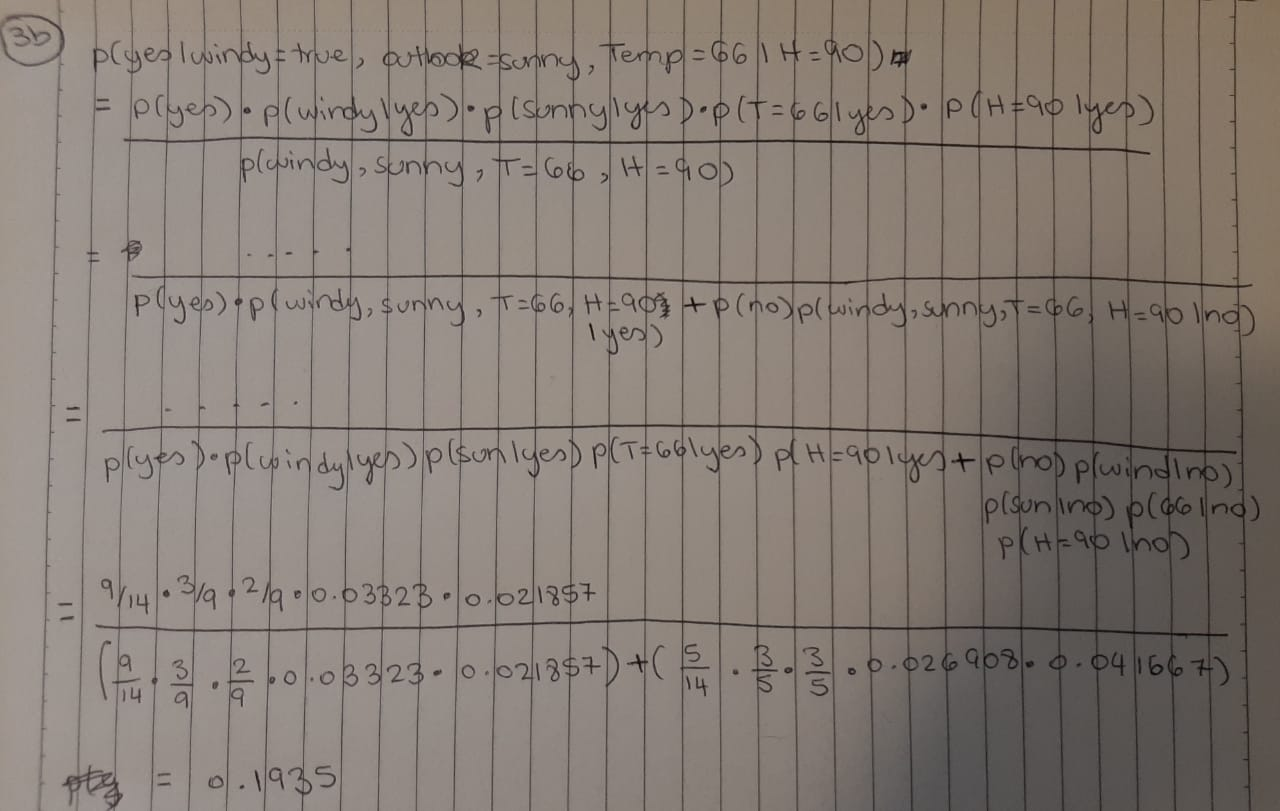

Laplace smoothing with alpha = 1 for categorical variables outlook = sunny and windy = true:

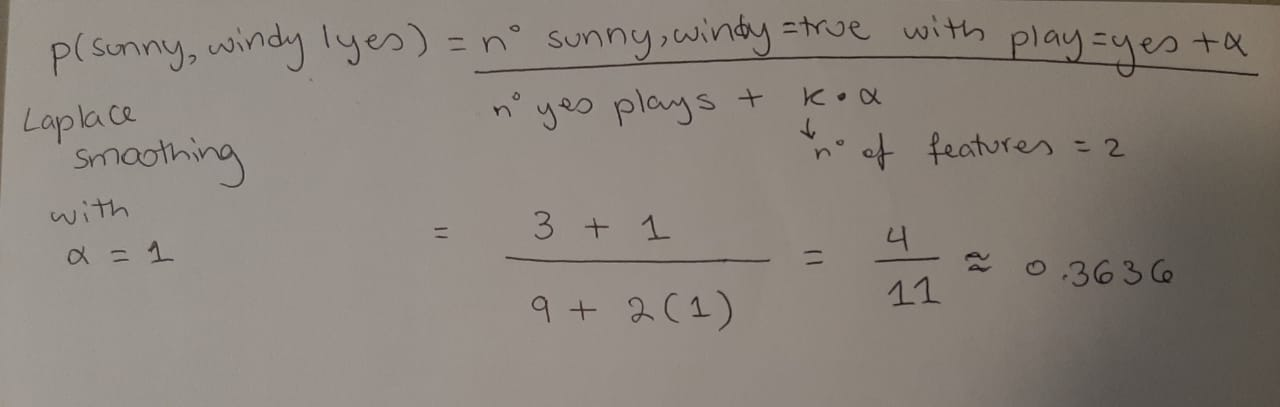

## Problem 4

Scaling generally influences gradient descent. 

Logistic Regression:
- When we apply a scaling factor of k, the speed at which we reach the optimum point for a feature is also affected (if k > 1, we would reach the optimum point faster and even overstep it and if k <<< 1, it would take many more steps to reach the optimum point). Hence we need to choose an appropriate scaling factor in order not to overstep the optimum point with the minimum number of steps
- Note that when we apply a scaling factor of k, let’s say we make the numerical value of the feature much larger, then after the model is learned, the weight of the feature becomes smaller and hence the weight become less penalized when we apply regularization such as L1 or L2 norm. However, if we do not apply regularization, the scaling would not affect the accuracy

KNN:
- Distance-based algorithms are most affected by the range of features. As one of the distance-based algorithms, KNN uses distances between data points to determine their similarity and performs the task. Therefore, if we scale the data before employing KNN, each feature will contribute differently from the original data.
- Since we are using distances between data points to determine their similarity in order to classify the points into different classes, scaling a particular feature would change how we determine the similarity between data points and hence how we split them into different classes 

LDA and QDA:
- Visually, when we scale features, the axis will be scaled/stretched, but the classification would be stretched relative to the points as well such that the points are still separated into the same classes
- Mathematically, the eigenvalue, that shows how much the classes are separated, will stay exactly the same

Gaussian Naive Bayes

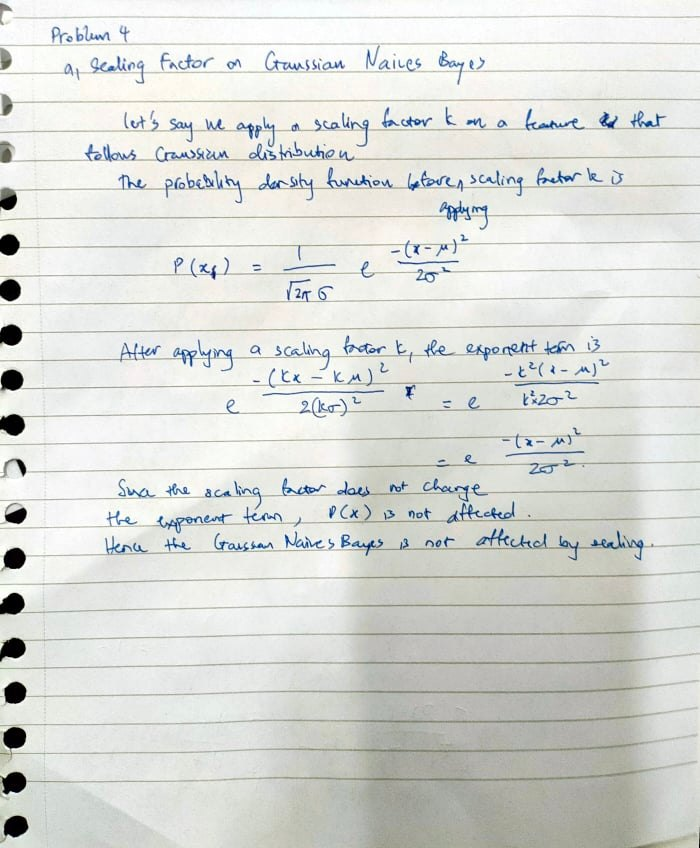

## Problem 5

Gaussian Discriminant Analysis

The main purpose of applying polynomial expansion on scaler features is to increase the complexity of the model and is useful in the case of non-linearly separable data. However, in the case of linearly separable data, the application of polynomial expansion would cause overfitting.

Logistic Regression

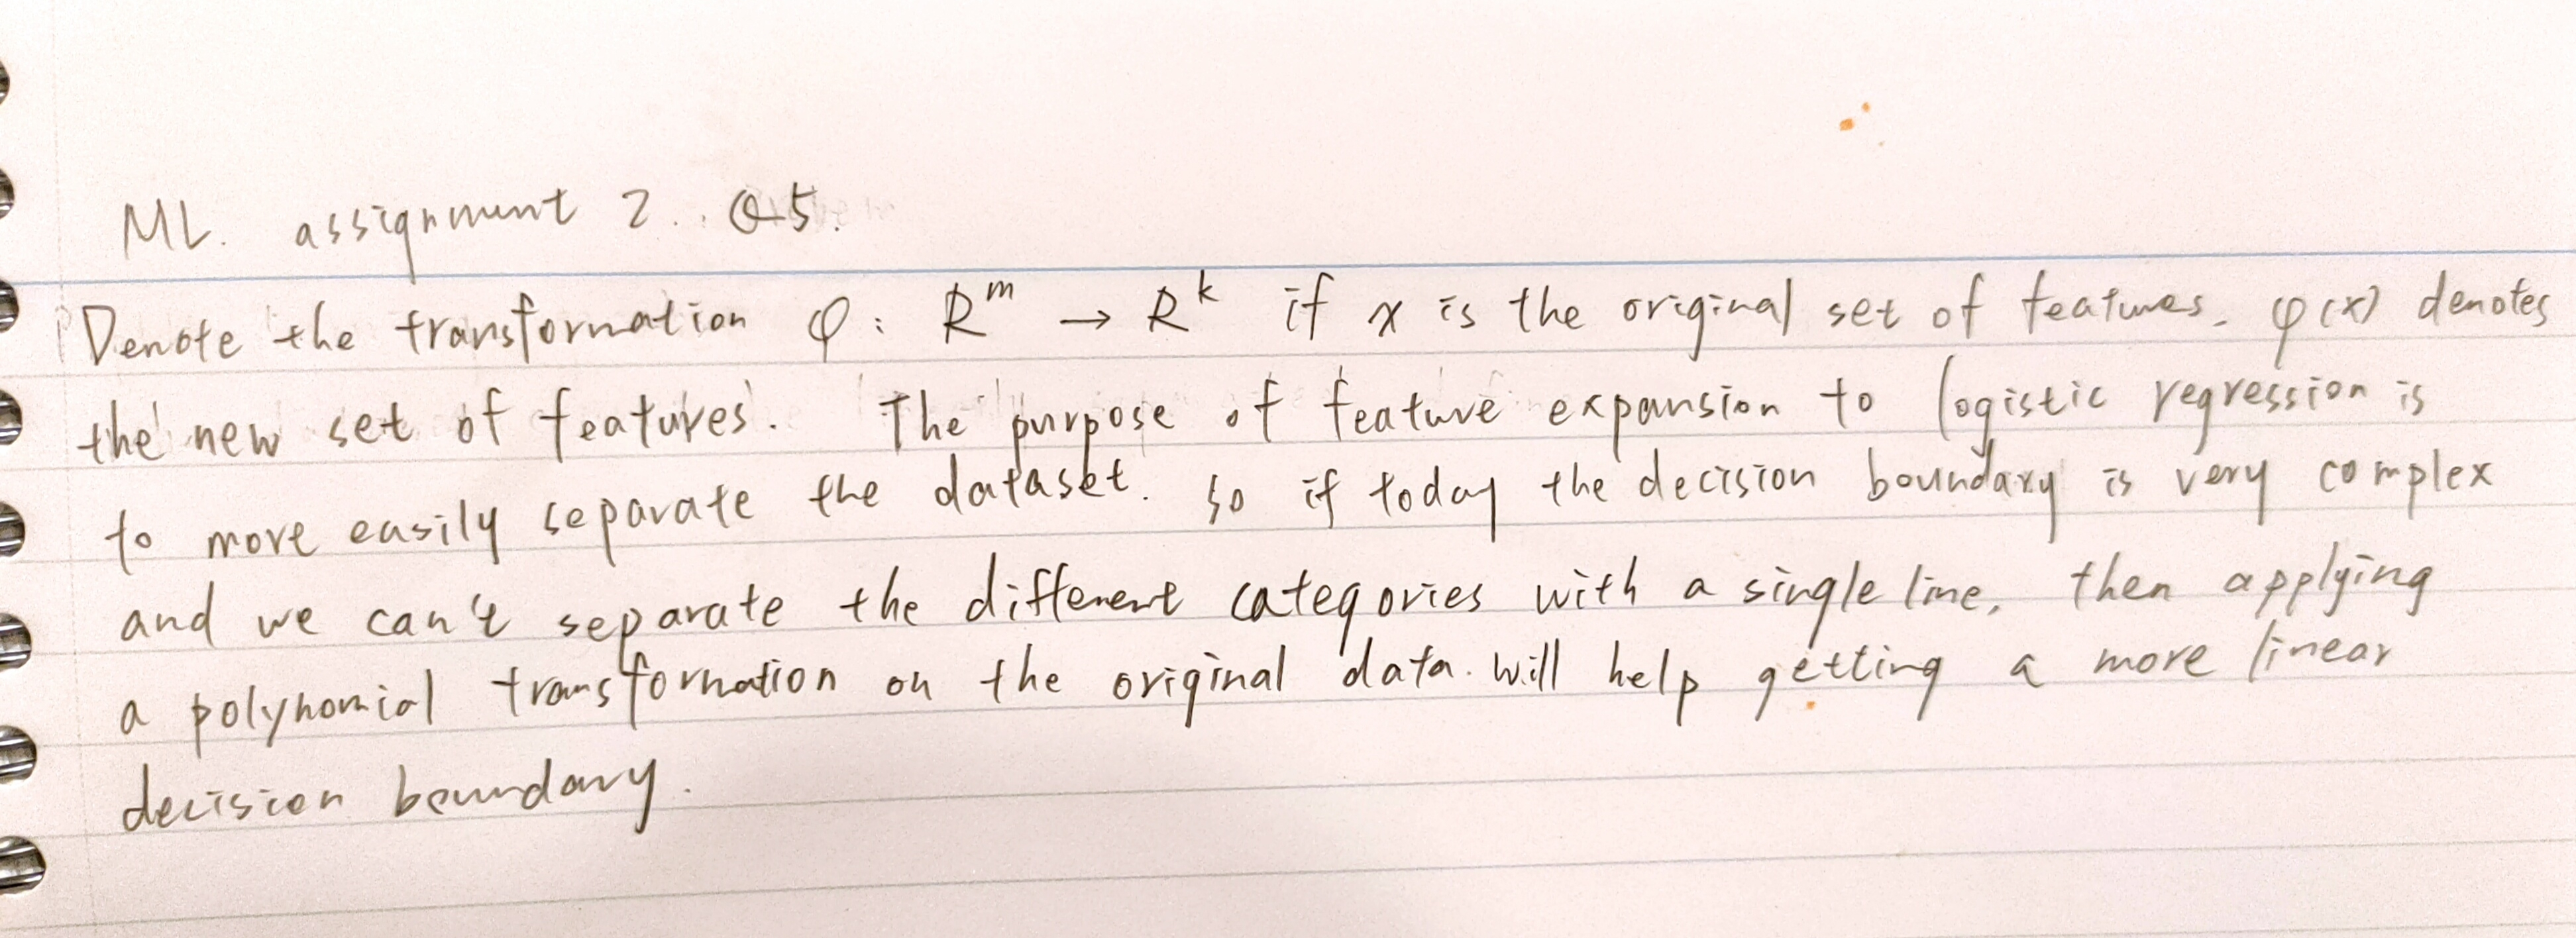

## Problem 6

In [ ]:
#imports
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import statistics
import time

plot_learning_curve function

In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [ ]:
# Loading boston dataset
df = load_breast_cancer()
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# Obtaining input and output data
# Standardizing input data by scaling and translating each dimension of the input data so that the mean and variance along each dimension are 0 and 1 respectively.
X = StandardScaler().fit_transform(df.data)
y = df.target

**Gaussian Naive Bayes**

0.1974937915802002 seconds


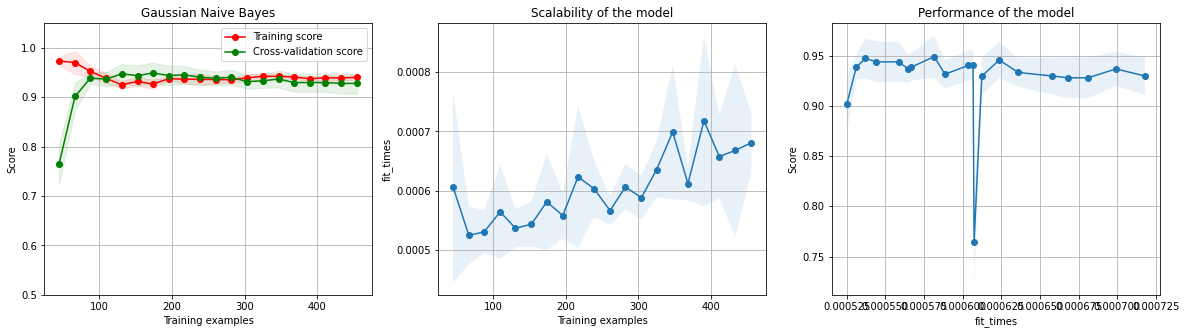

In [ ]:
clf = GaussianNB()
start_time = time.time()
plot_learning_curve(
    clf,
    "Gaussian Naive Bayes",
    X,
    y,
    axes=None, 
    ylim=(0.5, 1.05),
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
)
print("%s seconds" %(time.time() - start_time))

#fit times y axis: time used in fitting

**Linear Discriminant Analysis**

0.6568598747253418 seconds


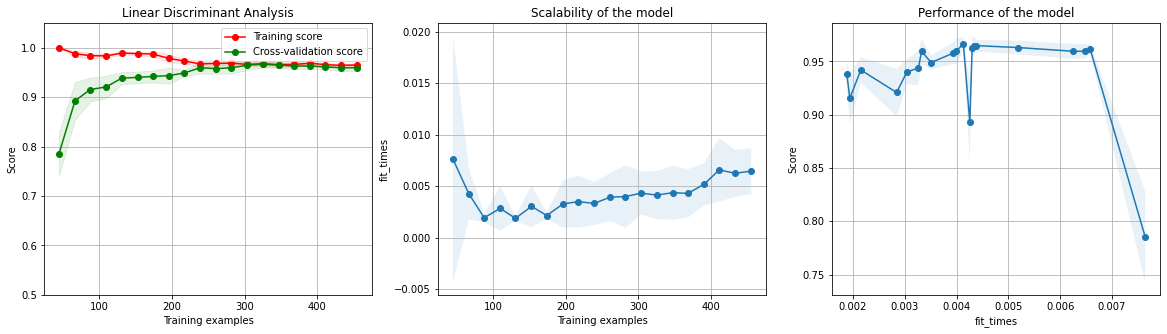

In [ ]:
clf = LinearDiscriminantAnalysis()
start_time = time.time()
plot_learning_curve(
    clf,
    "Linear Discriminant Analysis",
    X,
    y,
    axes=None, 
    ylim=(0.5, 1.05),
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
)
print("%s seconds" %(time.time() - start_time))

**Quadratic Discriminant Analysis**

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

0.3668513298034668 seconds


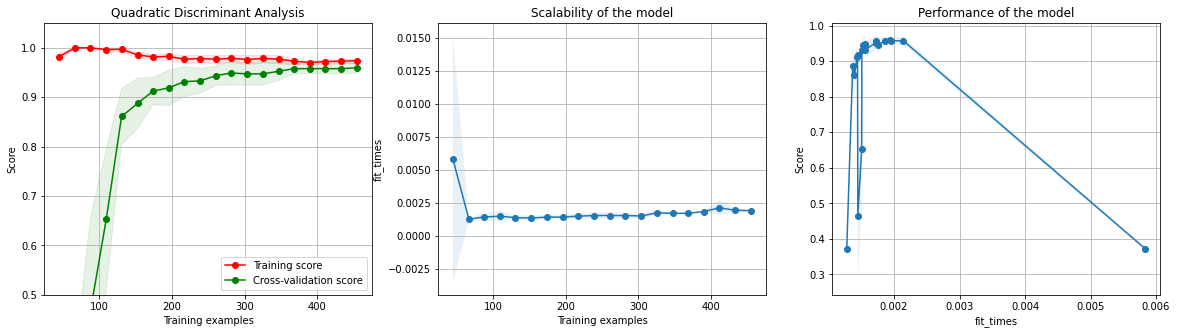

In [ ]:
clf = QuadraticDiscriminantAnalysis()
start_time = time.time()
plot_learning_curve(
    clf,
    "Quadratic Discriminant Analysis",
    X,
    y,
    axes=None, 
    ylim=(0.5, 1.05),
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
)
print("%s seconds" %(time.time() - start_time))

**Logistic Regression**

0.9390697479248047 seconds


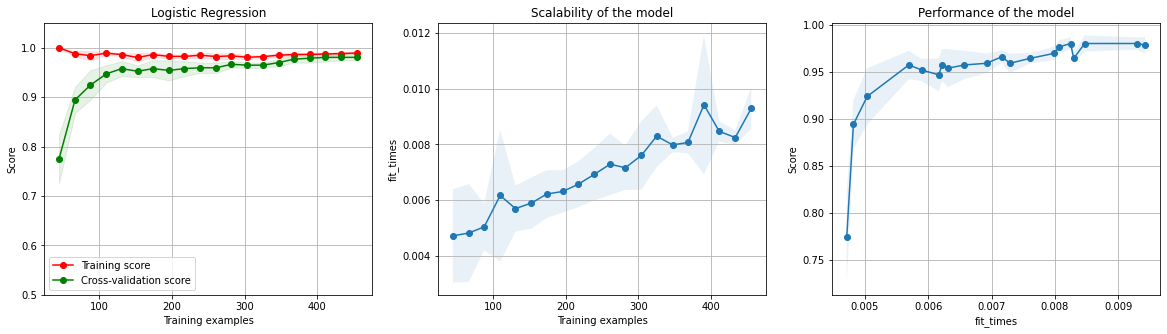

In [ ]:
clf = LogisticRegression()
start_time = time.time()
plot_learning_curve(
    clf,
    "Logistic Regression",
    X,
    y,
    axes=None, 
    ylim=(0.5, 1.05),
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
)
print("%s seconds" %(time.time() - start_time))

**K-nearest neighbor classifier with K = 1**

1.6697311401367188 seconds taken to plot the learning curve


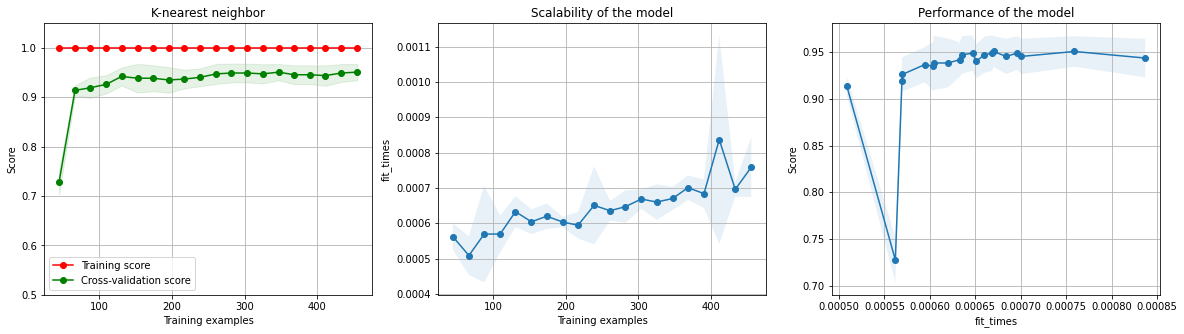

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
start_time = time.time()
plot_learning_curve(
    clf,
    "K-nearest neighbor",
    X,
    y,
    axes=None, 
    ylim=(0.5, 1.05),
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
)
print("%s seconds taken to plot the learning curve" %(time.time() - start_time))

Record the time taken to plot the learning curve for each of the classifiers as an indication of the time taken to train the classifier.

Questions:
1. Which of the classifiers is the most preferable if we want to maximize accuracy?
> Logistic Regression <br>
> Training score and validation (from the left graph) score are both high. Also test error from the right graph is high.
2. Which of the classifiers is the most preferable if speed is important and we need an accuracy of about 90%?
> Gaussian Naive Bayes
3. Which of the classifiers do you think is underfitting?
> Underfitting: training and validation scores are both low <br> We cannot really choose one because all of the above classifiers have scores coverging to 0.9 as we get more training examples

4. Which of the classifiers do you think is overfitting and could gain from having more data to train on?
> KNN <br>
high training score, low validation sccore <br> With more samples, validation score gets higher
5. Which of the classifiers would be the most preferable if we wanted to maximize accuracy but we are only allowed to train on 100 examples chosen uniformly at random from the dataset?
> Gaussian Naive Bayes <br>
The difference between training and validation scores is the smallest and around 0.95



*Repeat the above experiment with the digits dataset*

In [ ]:
df2 = load_digits()
#print(df2.DESCR)

In [ ]:
# Obtaining input and output data
# Standardizing input data by scaling and translating each dimension of the input data so that the mean and variance along each dimension are 0 and 1 respectively.
X = StandardScaler().fit_transform(df2.data)
y = df2.target

**Gaussian Naive Bayes**

0.6011331081390381 seconds


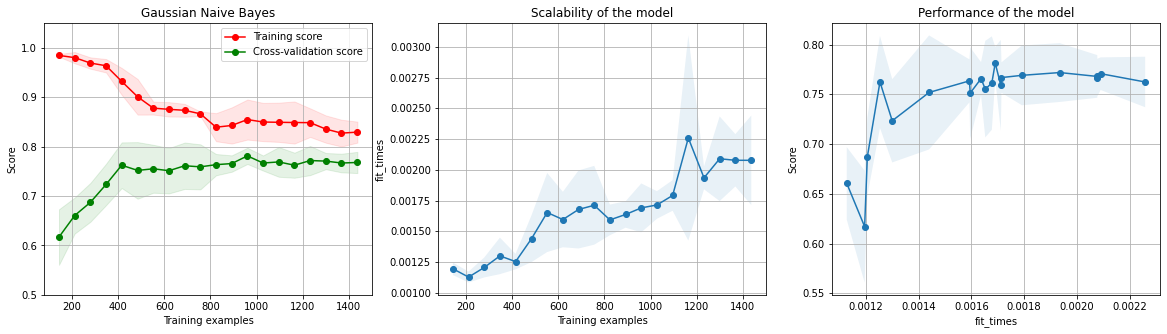

In [ ]:
clf = GaussianNB()
start_time = time.time()
plot_learning_curve(
    clf,
    "Gaussian Naive Bayes",
    X,
    y,
    axes=None, 
    ylim=(0.5, 1.05),
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
)
print("%s seconds" %(time.time() - start_time))

**Linear Discriminant Analysis**

1.8235461711883545 seconds


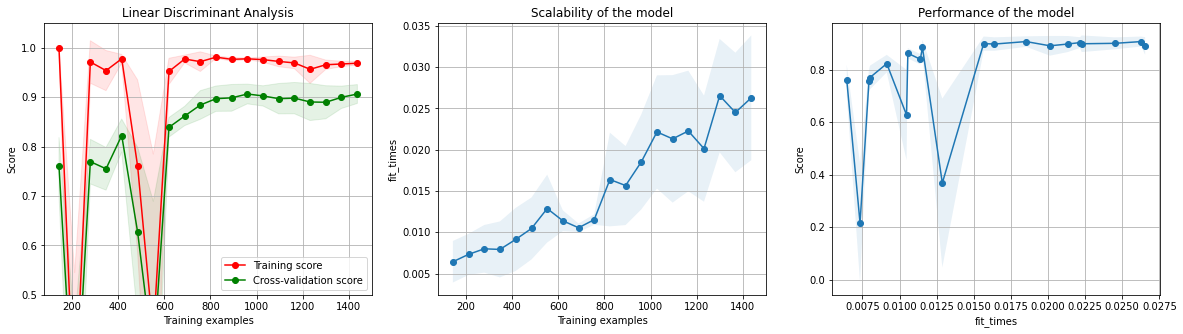

In [ ]:
clf = LinearDiscriminantAnalysis()
start_time = time.time()
plot_learning_curve(
    clf,
    "Linear Discriminant Analysis",
    X,
    y,
    axes=None, 
    ylim=(0.5, 1.05),
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
)
print("%s seconds" %(time.time() - start_time))

**Quadratic Discriminant Analysis**

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

6.200141668319702 seconds


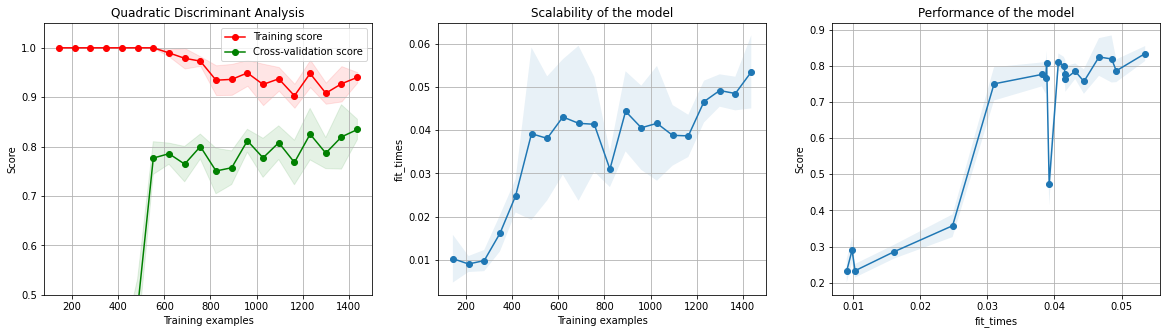

In [ ]:
clf = QuadraticDiscriminantAnalysis()
start_time = time.time()
plot_learning_curve(
    clf,
    "Quadratic Discriminant Analysis",
    X,
    y,
    axes=None, 
    ylim=(0.5, 1.05),
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
)
print("%s seconds" %(time.time() - start_time))

**Logistic Regression**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


12.16710877418518 seconds


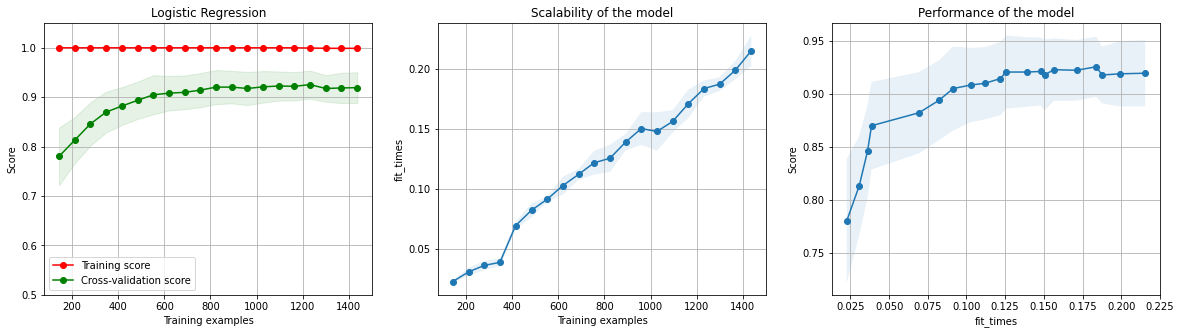

In [ ]:
clf = LogisticRegression()
start_time = time.time()
plot_learning_curve(
    clf,
    "Logistic Regression",
    X,
    y,
    axes=None, 
    ylim=(0.5, 1.05),
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
)
print("%s seconds" %(time.time() - start_time))

**K-nearest neighbor classifier with K = 1**

5.461352825164795 seconds


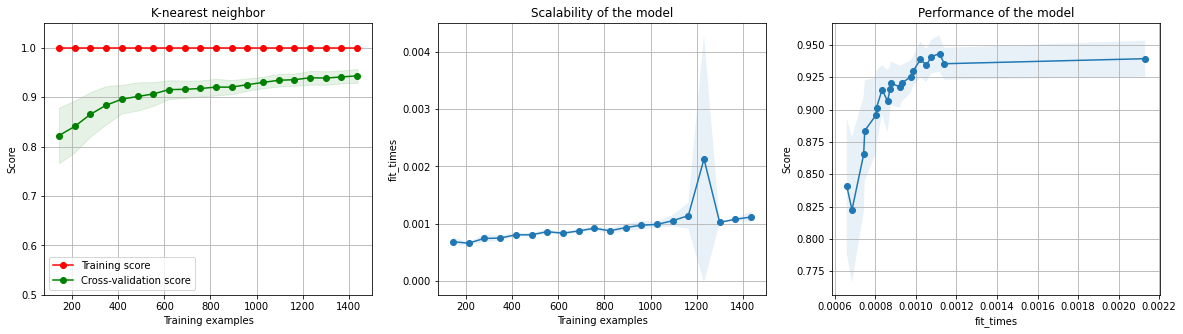

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
start_time = time.time()
plot_learning_curve(
    clf,
    "K-nearest neighbor",
    X,
    y,
    axes=None, 
    ylim=(0.5, 1.05),
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
)
print("%s seconds" %(time.time() - start_time))

Questions:
1. Which of the classifiers is the most preferable if we want to maximize accuracy?
> KNN 
2. Which of the classifiers is the most preferable if speed is important and we need an accuracy of about 90%?
> KNN
3. Which of the classifiers do you think is underfitting?
> Underfitting: training and validation scores are both low <br>
Gaussain Naive Bayes
4. Which of the classifiers do you think is overfitting and could gain from having more data to train on?
> QDA <br>
high training score, low validation sccore 
5. Which of the classifiers would be the most preferable if we wanted to maximize accuracy but we are only allowed to train on 100 examples chosen uniformly at random from the dataset?
> KNN is better than other if we only have 100 examples




## Problem 7

finished